In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/directional-forecasting-in-cryptocurrencies/sample_submission.csv
/kaggle/input/directional-forecasting-in-cryptocurrencies/train.csv
/kaggle/input/directional-forecasting-in-cryptocurrencies/test.csv


In [162]:
train=pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/train.csv')
test=pd.read_csv('/kaggle/input/directional-forecasting-in-cryptocurrencies/test.csv')
train

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00,58630.162800,144.0,54216.00,23325.927700,1.0
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00,44967.837600,99.0,52232.00,22484.030400,1.0
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00,91526.987200,177.0,108324.00,46673.061600,0.0
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00,56443.003800,107.0,32713.00,14097.148900,0.0


In [163]:
train.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01
std,3.676171e+07,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01
min,1.525471e+09,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.557308e+09,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00
50%,1.589144e+09,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00
75%,1.620981e+09,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00
max,1.652817e+09,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00


In [164]:
test.describe()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
count,909617.000000,9.096170e+05,909617.000000,909617.000000,909617.000000,909617.000000,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05
mean,454808.000000,1.680106e+09,0.468089,0.468342,0.467828,0.468102,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04
std,262583.954242,1.575504e+07,0.104381,0.104434,0.104319,0.104384,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05
min,0.000000,1.652817e+09,0.288400,0.290600,0.287200,0.288400,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,227404.000000,1.666462e+09,0.379700,0.379900,0.379500,0.379700,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04
50%,454808.000000,1.680106e+09,0.466500,0.466800,0.466300,0.466600,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04
75%,682212.000000,1.693750e+09,0.521300,0.521500,0.521100,0.521300,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04
max,909616.000000,1.707394e+09,0.909000,0.938000,0.899000,0.909100,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07


In [165]:
print(max(train['timestamp']))

1652817480


In [166]:
print(min(test['timestamp']))

1652817480


In [167]:
print(max(test['timestamp']))

1707394440


In [168]:
# Get the last entry of the 'target' column
first_entry = train['timestamp'].iloc[0]
first_entry

1525471260

In [169]:
# train['timestamp'] = train['timestamp'] - first_entry

In [170]:
# test['timestamp'] = test['timestamp'] - first_entry

In [171]:
train.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


In [172]:
test.head()

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.4306,0.4308,0.4301,0.4301,101150.0,43542.2629,105.0,46109.0,19851.7237
1,1,1652817540,0.4301,0.4303,0.4293,0.4302,275647.0,118478.9689,228.0,91260.0,39217.6312
2,2,1652817600,0.4302,0.4302,0.4292,0.4299,134959.0,57979.2418,156.0,56685.0,24357.5448
3,3,1652817660,0.4299,0.4303,0.4299,0.4301,316209.0,135979.4040,121.0,161740.0,69552.2691
4,4,1652817720,0.4302,0.4307,0.4302,0.4303,107440.0,46243.7993,113.0,31096.0,13384.3384


In [173]:
# Get the number of unique values in each column
unique_counts = train.nunique()

# Print the column name and the count of unique values
for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")


Column 'timestamp' has 2122438 unique values.
Column 'open' has 98106 unique values.
Column 'high' has 95397 unique values.
Column 'low' has 95511 unique values.
Column 'close' has 97452 unique values.
Column 'volume' has 1488655 unique values.
Column 'quote_asset_volume' has 2117249 unique values.
Column 'number_of_trades' has 13360 unique values.
Column 'taker_buy_base_volume' has 1198193 unique values.
Column 'taker_buy_quote_volume' has 2097044 unique values.
Column 'target' has 2 unique values.


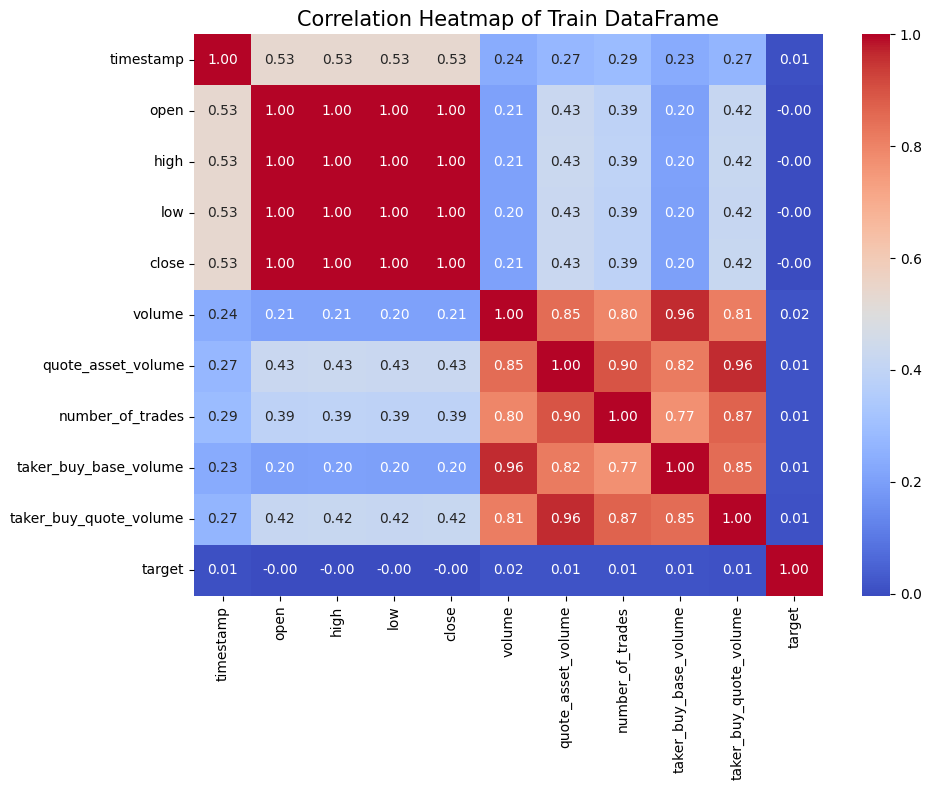

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (only for numerical columns)
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title to the plot
plt.title('Correlation Heatmap of Train DataFrame', fontsize=15)

# Show the heatmap
plt.tight_layout()
plt.show()


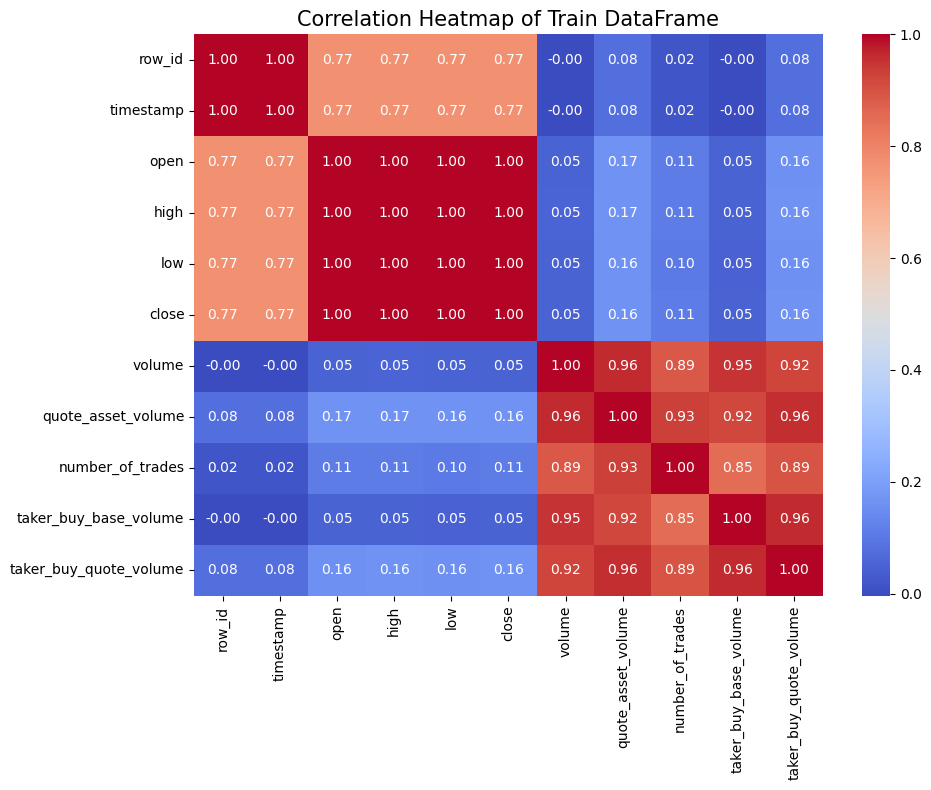

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (only for numerical columns)
correlation_matrix = test.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title to the plot
plt.title('Correlation Heatmap of Train DataFrame', fontsize=15)

# Show the heatmap
plt.tight_layout()
plt.show()


Skewness of timestamp: 1.9030086518458864e-16
Skewness of open: 1.3428786581865355
Skewness of high: 1.3443929628667426
Skewness of low: 1.3413939938753952
Skewness of close: 1.342895891832661
Skewness of volume: 15.676079909051225
Skewness of quote_asset_volume: 12.106660414893222
Skewness of number_of_trades: 13.997126462148309
Skewness of taker_buy_base_volume: 14.340090757883807
Skewness of taker_buy_quote_volume: 11.673841873689797


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

ValueError: num must be an integer with 1 <= num <= 4, not 5

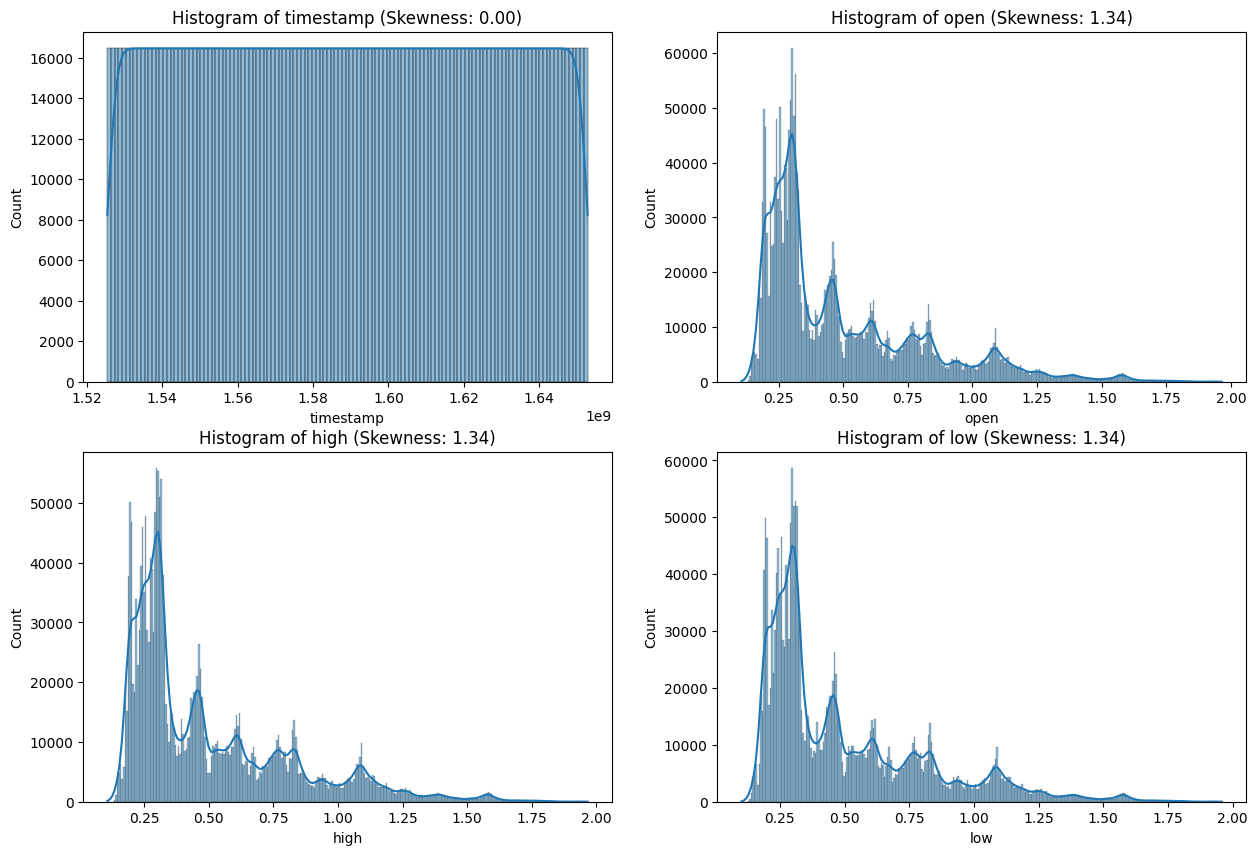

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Specify your target column
target_column = 'target'

# Initialize a dictionary to store skewness
skewness_dict = {}

# Loop through each column to calculate skewness
for column in train.columns:
    if column != target_column:
        skewness = skew(train[column])
        skewness_dict[column] = skewness
        print(f'Skewness of {column}: {skewness}')

# Plot histograms for each feature column
plt.figure(figsize=(15, 10))
for i, column in enumerate(train.columns):
    if column != target_column:
        plt.subplot(2, 2, i+1)
        sns.histplot(train[column], kde=True)
        plt.title(f'Histogram of {column} (Skewness: {skewness_dict[column]:.2f})')

plt.tight_layout()
plt.show()


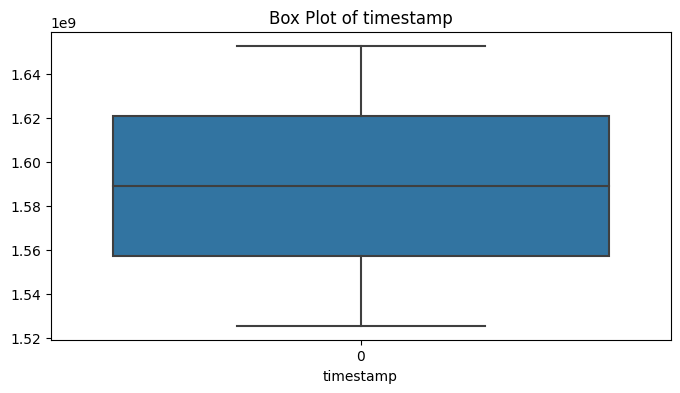

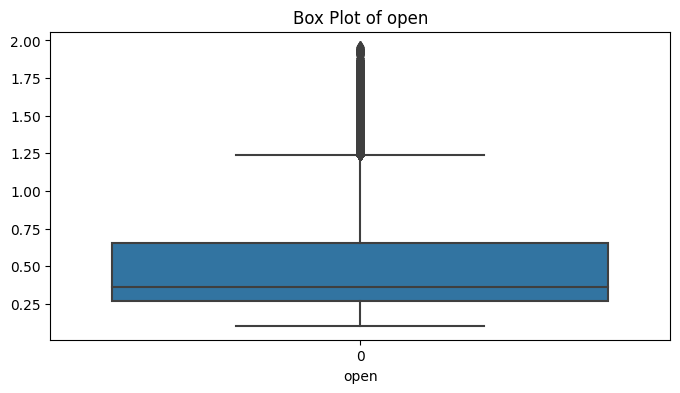

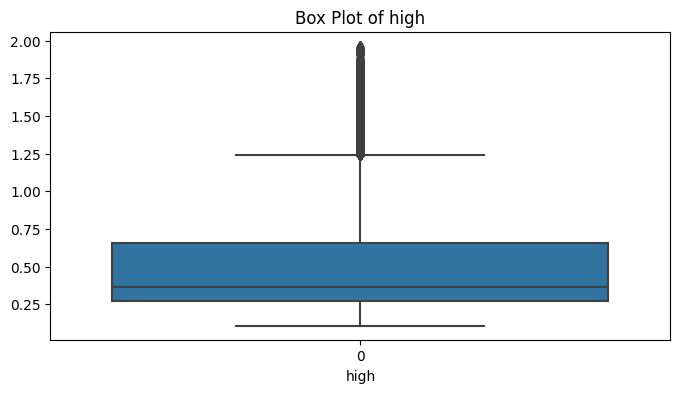

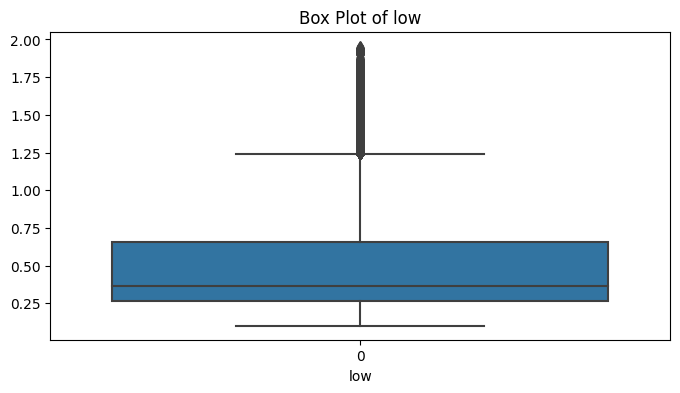

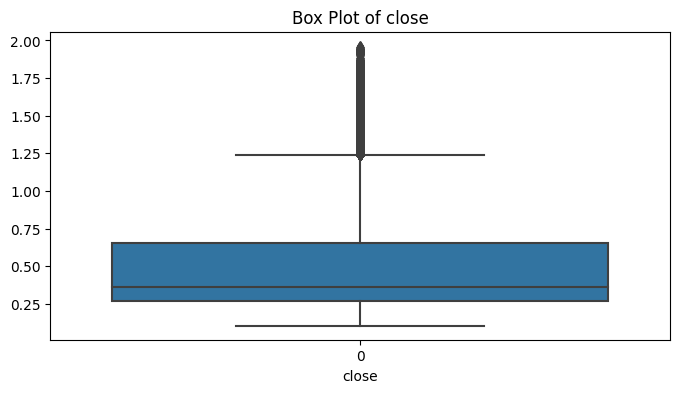

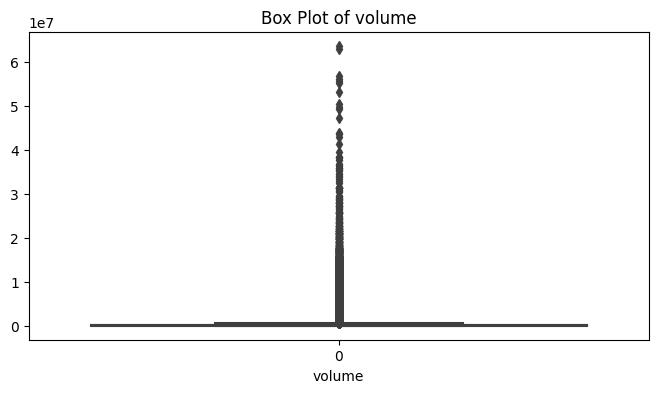

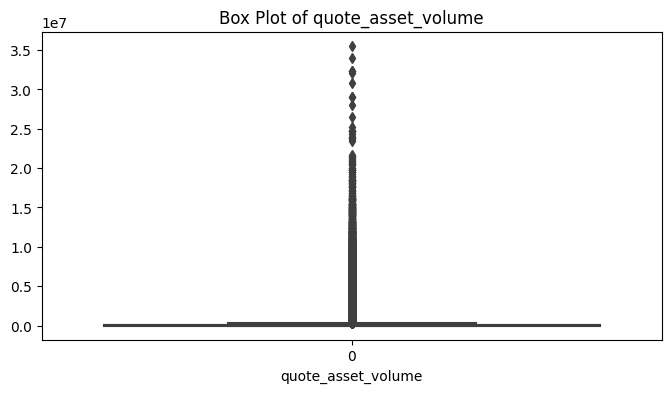

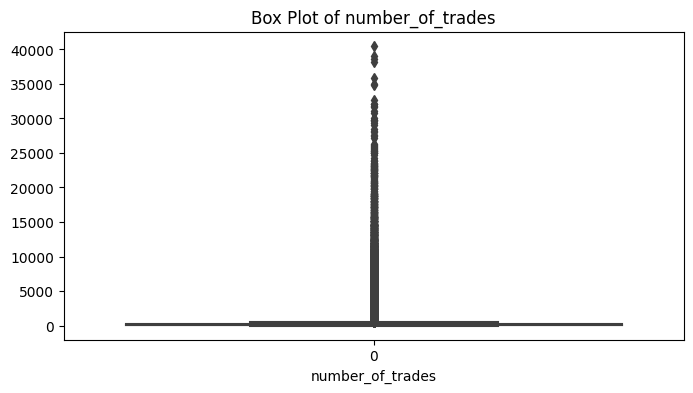

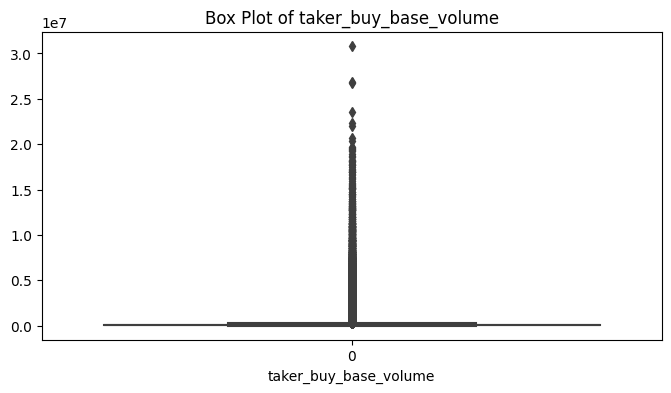

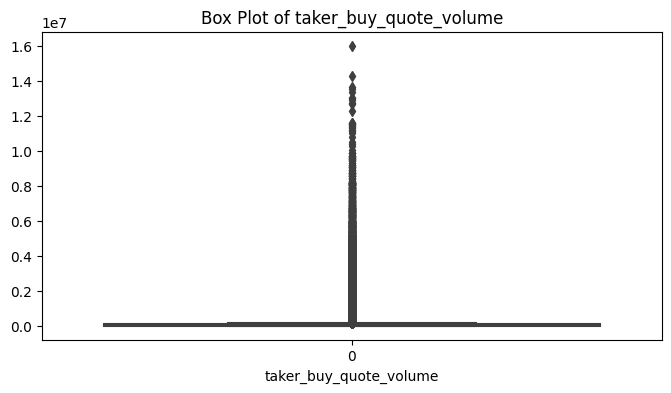

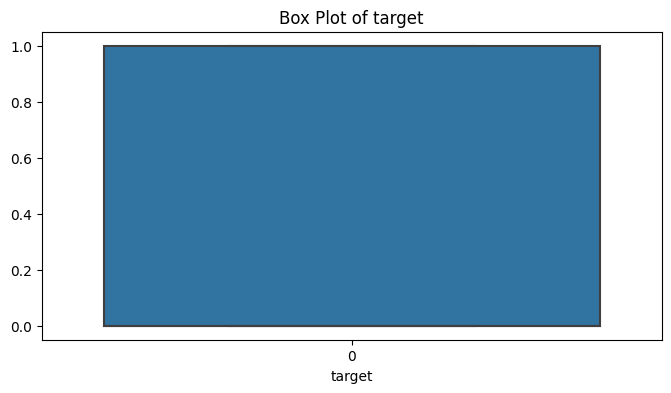

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create individual box plots for each column
for column in train.select_dtypes(include=['float64', 'int64']).columns:  # Adjust data types as necessary
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


In [178]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select the columns with perfect correlation (open, close, high, low)
columns_of_interest = ['open', 'close', 'high', 'low']
X = train[columns_of_interest].dropna()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # You can start with 3 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance*100:.2f}% of variance explained')

# You can reduce dimensionality based on explained variance
# e.g., if the first component explains >95%, you can retain just the first component


Principal Component 1: 100.00% of variance explained
Principal Component 2: 0.00% of variance explained
Principal Component 3: 0.00% of variance explained


In [179]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select the columns with perfect correlation (open, close, high, low)
columns_of_interest = ['open', 'close', 'high', 'low']
X = test[columns_of_interest].dropna()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # You can start with 3 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance*100:.2f}% of variance explained')

# You can reduce dimensionality based on explained variance
# e.g., if the first component explains >95%, you can retain just the first component


Principal Component 1: 100.00% of variance explained
Principal Component 2: 0.00% of variance explained
Principal Component 3: 0.00% of variance explained


In [180]:
train1=train.copy()
train1

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00,58630.162800,144.0,54216.00,23325.927700,1.0
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00,44967.837600,99.0,52232.00,22484.030400,1.0
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00,91526.987200,177.0,108324.00,46673.061600,0.0
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00,56443.003800,107.0,32713.00,14097.148900,0.0


In [181]:
test1=test.copy()
test1

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.4306,0.4308,0.4301,0.4301,101150.0,43542.2629,105.0,46109.0,19851.7237
1,1,1652817540,0.4301,0.4303,0.4293,0.4302,275647.0,118478.9689,228.0,91260.0,39217.6312
2,2,1652817600,0.4302,0.4302,0.4292,0.4299,134959.0,57979.2418,156.0,56685.0,24357.5448
3,3,1652817660,0.4299,0.4303,0.4299,0.4301,316209.0,135979.4040,121.0,161740.0,69552.2691
4,4,1652817720,0.4302,0.4307,0.4302,0.4303,107440.0,46243.7993,113.0,31096.0,13384.3384
...,...,...,...,...,...,...,...,...,...,...,...
909612,909612,1707394200,0.5141,0.5144,0.5141,0.5143,115358.0,59321.7124,64.0,103183.0,53061.6505
909613,909613,1707394260,0.5144,0.5144,0.5142,0.5143,100017.0,51433.4744,59.0,29333.0,15084.3792
909614,909614,1707394320,0.5143,0.5144,0.5142,0.5142,51665.0,26573.9877,46.0,33916.0,17445.9911
909615,909615,1707394380,0.5143,0.5144,0.5143,0.5143,28063.0,14433.0717,35.0,16810.0,8645.6538


In [182]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming train1 and test1 are your training and test DataFrames

# Specify the columns with high correlation
columns_of_interest = ['open', 'close', 'high', 'low']

# Fit PCA on the training set
pca = PCA(n_components=1)  # We only need the first principal component
pca.fit(train1[columns_of_interest])

# Transform the training set
train1['pca_feature'] = pca.transform(train1[columns_of_interest])

# Transform the test set using the same PCA model
test1['pca_feature'] = pca.transform(test1[columns_of_interest])

# Optionally, drop the original columns from both sets
train1 = train1.drop(columns_of_interest, axis=1)
test1 = test1.drop(columns_of_interest, axis=1)

# Now both train1 and test1 contain the new 'pca_feature'
print(train1.head())
print(test1.head())


    timestamp   volume  quote_asset_volume  number_of_trades  \
0  1525471260   134.98          121.646459               4.0   
1  1525471320  1070.54          965.505313              12.0   
2  1525471380  2293.06         2066.963991               5.0   
3  1525471440  6850.59         6175.000909              19.0   
4  1525471500   832.30          750.222624               3.0   

   taker_buy_base_volume  taker_buy_quote_volume  target  pca_feature  
0                 125.08              112.723589     1.0     0.808299  
1                 879.94              793.612703     0.0     0.809599  
2                   0.00                0.000000     0.0     0.808589  
3                1786.30             1610.149485     0.0     0.808579  
4                 784.82              707.428900     0.0     0.808489  
   row_id   timestamp    volume  quote_asset_volume  number_of_trades  \
0       0  1652817480  101150.0          43542.2629             105.0   
1       1  1652817540  275647.0      

In [183]:
test1.describe()

,row_id,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,pca_feature
count,909617.000000,9.096170e+05,9.096170e+05,9.096170e+05,909617.000000,9.096170e+05,9.096170e+05,909617.000000
mean,454808.000000,1.680106e+09,2.484656e+05,1.187006e+05,149.763820,1.239818e+05,5.920098e+04,-0.058020
std,262583.954242,1.575504e+07,4.606647e+05,2.494472e+05,364.157423,2.343786e+05,1.268206e+05,0.208758
min,0.000000,1.652817e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-0.416098
25%,227404.000000,1.666462e+09,7.538700e+04,3.355523e+04,53.000000,3.209500e+04,1.433058e+04,-0.234850
50%,454808.000000,1.680106e+09,1.472370e+05,6.706755e+04,88.000000,6.982900e+04,3.166280e+04,-0.061100
75%,682212.000000,1.693750e+09,2.748180e+05,1.285332e+05,151.000000,1.398770e+05,6.513958e+04,0.048401
max,909616.000000,1.707394e+09,4.083906e+07,2.218319e+07,48569.000000,2.227382e+07,1.153613e+07,0.832528


In [184]:
train1.describe()

,timestamp,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,pca_feature
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01,-8.623178e-17
std,3.676171e+07,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01,6.295854e-01
min,1.525471e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.841910e-01
25%,1.557308e+09,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00,-4.589900e-01
50%,1.589144e+09,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00,-2.682769e-01
75%,1.620981e+09,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00,3.201472e-01
max,1.652817e+09,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00,2.930554e+00


In [185]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming train1 is your DataFrame
# Select the columns for PCA
pca_columns = ['volume', 'quote_asset_volume', 'number_of_trades', 
               'taker_buy_base_volume', 'taker_buy_quote_volume']

# Step 1: Extract the data for PCA
X = train1[pca_columns].dropna()  # Drop any rows with NaN values if necessary

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=5)  # Fit PCA without specifying n_components to get all components
pca_result = pca.fit_transform(X_scaled)

# Step 4: Get explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance*100:.2f}% of variance explained')


Principal Component 1: 88.71% of variance explained
Principal Component 2: 6.99% of variance explained
Principal Component 3: 2.99% of variance explained
Principal Component 4: 1.23% of variance explained
Principal Component 5: 0.10% of variance explained


In [186]:
import pandas as pd

# Assuming test1 is your DataFrame
# Calculate skewness for all numerical columns
skewness = train1.skew()

# Display skewness values
print("Skewness for all columns:")
print(skewness)


Skewness for all columns:
timestamp                 1.903010e-16
volume                    1.567609e+01
quote_asset_volume        1.210667e+01
number_of_trades          1.399714e+01
taker_buy_base_volume     1.434010e+01
taker_buy_quote_volume    1.167385e+01
target                    9.697417e-02
pca_feature               1.342879e+00
dtype: float64


In [188]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
import numpy as np


# Separate features and target variable from the training set
X_train = train1.drop(columns='target')  # Features
y_train = train1['target']                # Target variable

# Define the parameter grid for Randomized Search
param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
}

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize RandomizedSearchCV with TimeSeriesSplit
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   scoring='f1_macro', n_iter=50, cv=tscv, 
                                   verbose=1, n_jobs=1, random_state=42)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_model = random_search.best_estimator_

# Print the best parameters found by Randomized Search
print("Best parameters found: ", random_search.best_params_)


# Prepare test features
X_test = test1.drop(columns='row_id')  # Use your actual feature columns

# Make predictions on the test set using the best model
predictions = best_model.predict(X_test)

# Prepare the submission DataFrame with row_id and predicted target
submission = pd.DataFrame({
    'row_id': test1['row_id'],  # Corresponding row_ids from test1
    'target': predictions        # Predicted targets
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

# Print the submission DataFrame
print("\nSubmission DataFrame:")
print(submission)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2}

Submission DataFrame:
        row_id  target
0            0       0
1            1       0
2            2       0
3            3       0
4            4       0
...        ...     ...
909612  909612       0
909613  909613       0
909614  909614       0
909615  909615       0
909616  909616       0

[909617 rows x 2 columns]


In [189]:
# Assuming 'predictions' contains your predicted values
predictions_count = pd.Series(predictions).value_counts()

# Print the counts of each class (0 and 1)
print("\nCount of predicted classes:")
print(predictions_count)

# If you want to assign the counts to variables for further use
count_0 = predictions_count.get(0, 0)  # Count of 0's, defaults to 0 if not present
count_1 = predictions_count.get(1, 0)  # Count of 1's, defaults to 0 if not present

print(f"\nNumber of predicted 0s: {count_0}")
print(f"Number of predicted 1s: {count_1}")



Count of predicted classes:
0    799997
1    109620
Name: count, dtype: int64

Number of predicted 0s: 799997
Number of predicted 1s: 109620
